# Lab 3

#### Tanner Kogel tjk190000

##### MECH 6317.001: Dynaics of Complex Networks & Systems

imoport all important libraries

In [2]:
import networkx as nx
import numpy
import numpy.linalg as la
import matplotlib.pyplot as plt

## Stub code functions

This function prints the top five (or `num`) nodes according to the centrality vector `v`, where `v` takes the form: `v[nidx]` is the centrality of the node that is the `nidx`-th element of `G.nodes()`

In [3]:
def print_top_5(G,v, num=5):
    thenodes = list(G.nodes())
    idx_list = [(i,v[i]) for i in range(len(v))]
    idx_list = sorted(idx_list, key = lambda x: x[1], reverse=True)
    for i in range(min(num,len(idx_list))):
        nidx, score = idx_list[i]
        print('  %i. %s (%1.4f)' % (i+1,thenodes[nidx],score))
        #print '  %i. %s' % (i+1,G.node_object(idx))

This function returns the index of the maximum of the array. If two or more indices have the same max value, the first index is returned.

In [4]:
def index_of_max(v):
    return numpy.where(v == max(v))[0]

This function accepts a dictionary of nodes with centrality values and returns a centrality vector

In [5]:
def centrality_vector(G,d):
    thenodes = list(G.nodes())
    v = numpy.zeros((G.number_of_nodes(),))
    for i,u in enumerate(thenodes):
        v[i] = d[u]
    return v

This function provides the index of a node based on its order in `G.nodes()`

In [6]:
def node_index(G,n):
    thenodes = list(G.nodes())
    return thenodes.index(n)

Now we read in the edgelist file that contains the coappearance network we will analyze. We will look at two different networks, corresponding to only the *Lord of the Rings* series and the *Lord of the Rings* series plus the prequel, The *Hobbit*. The `unweighted` boolean, if set to `True` will set all the edge weights to one. Recall that setting all weights to 1 is different (in NetworkX) from having no weights assigned, which could be accomplished instead by: `G = nx.read_edgelist('LoTR_characters.edgelist',data=False)`.

In [7]:
unweighted = False
#G = nx.read_weighted_edgelist('LotR_characters.edgelist') # just Lord of the Rings
G = nx.read_weighted_edgelist('hobbit_LotR_characters.edgelist') # with the Hobbit
if unweighted:
    for u,v in G.edges():
        G[u][v]['weight'] = 1
A = nx.to_numpy_array(G)
N = G.number_of_nodes()

## Section 7.1: Degree Centrality

### use the defined function from the stub code to print out top 5 characters with highest degree centrality

In [8]:
d = dict.fromkeys(G.nodes(),0)              # predefine d as a dictionary for all nodes in G with degree 0
for i in G.nodes():                         # loop over all nodes
    idx = node_index(G,i)                   # get index for node i
    d[i] = sum(A[idx])                      # sum all weights in row of adjacency matrix
v = centrality_vector(G,d)                  # use function to get centrality vector
print('top 5 degree centrality characters') # label output
print_top_5(G,v)                            # use function to print top five characters in terms of degree centrality (including weights)

top 5 degree centrality characters
  1. gandalf (901.0000)
  2. frodo (661.0000)
  3. aragorn (632.0000)
  4. pippin (606.0000)
  5. bilbo (602.0000)


## Section 7.2: Eigenvector Centrality

### print out the eigenvector centrality by using the built in function eigenvector_centrality

In [9]:
print('Eigenvector Centrality (by NetworkX):')   # display the method via networkx
d = nx.eigenvector_centrality(G,weight='weight') # dictionary output of networkx function
v = centrality_vector(G,d)                       # get eigenvector centrality vector
print_top_5(G,v)                                 # use function to output top 5 characters

Eigenvector Centrality (by NetworkX):
  1. gandalf (0.3570)
  2. frodo (0.2827)
  3. aragorn (0.2783)
  4. pippin (0.2723)
  5. bilbo (0.2287)


### print out the eigenvector centrality by using linear algebra

In [10]:
print('Eigenvector Centrality (by linear algebra):') # display the method via linear algebra
k, v = la.eig(A)                                     # find eigenvalues k and eigenvectors v
k1_idx = index_of_max(k)                             # find the index of the largest eigenvalue
v_R = numpy.abs(v[:,k1_idx])                         # centrality vector of function (assumes no complex values)
print_top_5(G,v_R)                                   # use function to output top 5 characters

Eigenvector Centrality (by linear algebra):
  1. gandalf (0.3570)
  2. frodo (0.2827)
  3. aragorn (0.2783)
  4. pippin (0.2723)
  5. bilbo (0.2287)


### print out both the centrality and the weighted sum of the centralities(normalized by $k_1$) of the neighbors of any character

In [11]:
noi = 'aragorn'             # choose any character
noi_idx = node_index(G,noi) # use function to find index value for given character 
# label outupt
print('Confirming that eigenvector centrality is a steady-state of sorts for node %s:' % noi)

centrality = numpy.abs(v[noi_idx,k1_idx])                                     # find eigenvector centrality from centrality vector
print('Eigenvector centrality for node %s: %1.4f' % (noi,centrality))         # output eigenvector centrality
centrality_sum = 0                                                            # initialize a value at 0
noi_neighb_list = list(G.neighbors(noi))                                      # find all neighbors
for neighb in noi_neighb_list:                                                # add each neighbor
    neighb_idx = node_index(G,neighb)                                         # index of neighbors
    neighb_centrality = numpy.abs(v[neighb_idx,k1_idx])                       # centrality value of neighbors
    centrality_sum = centrality_sum + A[noi_idx,neighb_idx]*neighb_centrality # add weighted centrality of neighbors
centrality_sum = centrality_sum / numpy.abs(max(k))                           # normalize by largest eigenvector
# output normalized centrality sum
print('Sum of the centralities of neighbors of %s normalized by the largest eigenvalue: %1.4f' % (noi,centrality_sum))

Confirming that eigenvector centrality is a steady-state of sorts for node aragorn:
Eigenvector centrality for node aragorn: 0.2783
Sum of the centralities of neighbors of aragorn normalized by the largest eigenvalue: 0.2783


The following section should run and produce a plot that you need to interpret.

Showing the convergece of eigenvector centrality...


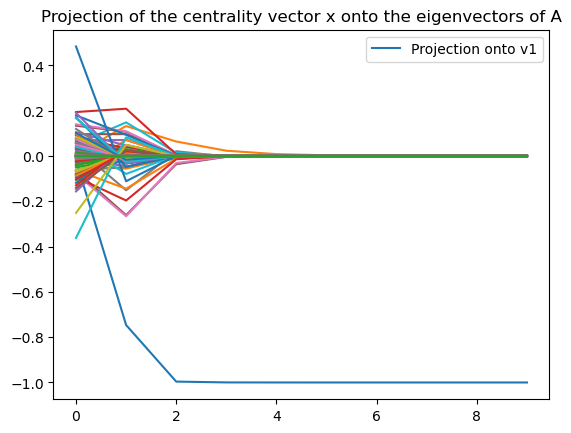

In [12]:
print('Showing the convergece of eigenvector centrality...')
num_steps = 10
x = numpy.zeros((N,1)) # initial centrality vector
x[76] = 1
cs = numpy.zeros((N,num_steps))
for i in range(num_steps):
    x = x/la.norm(x) # at each step we need to normalize the centrality vector
    for j in range(G.number_of_nodes()):
        cs[j,i] = numpy.real(numpy.dot( x.T , v[:,j] ))[0] # project x onto each of the eigenvectors
    x = numpy.dot(A,x) # "pass" the centrality one step forward

plt.figure() # this creates a figure to plot in
for i in range(G.number_of_nodes()): # for each eigenvector plot the projection of x onto it over the steps
    if i == k1_idx:
        plt.plot(range(num_steps),cs[i,:],label='Projection onto v1') # only label the eigenvector v1
    else:
        plt.plot(range(num_steps),cs[i,:])
#plt.ylim([-0.2,1.1]) # this sets the limits for the y axis
plt.legend(loc='best') # this attaches a legend
plt.title('Projection of the centrality vector x onto the eigenvectors of A') # this adds a title
plt.show() # this makes the figure appear

In this graph, we are seeing the evolution of the eigenvector centrality from an arbitrary starting point. The blue line that quickly approaches 1 is the eigenvector that relates to the largest eigenvalue. This eigenvector is equivalent to the centraliy vector while the other eigenvectors are ignored. The graph proves that this method is valid as the ignored eigenvectors converge to zero in steady state, and the eigenvector centrality converges to 1 in steady state.

## Section 7.3: Katz Centrality

### print the top 5 central characters in terms of Katz centrality for varying values of $\alpha$ using linear algebra

In [313]:
print('Katz Centrality:')                                                               # label section
inv_max_eig = 1/max(numpy.abs(k))                                                       # inverse of largest eigenvalue
alpha_list = [inv_max_eig,inv_max_eig-0.0001,inv_max_eig/2,inv_max_eig/3,inv_max_eig/4] # various alpha values
for alpha in alpha_list:                                                                # repeat for each alpha value
    v = numpy.dot( la.inv(numpy.eye(N) - alpha*A) , numpy.ones((N,1)) )                 # linear algebraic equation for centrality vector
    print('Top 5 central characters using Katz centrality (alpha = %1.4f):' % alpha)    # label output with alpha value
    print_top_5(G,v)                                                                    # output top characters

Katz Centrality:
Top 5 central characters using Katz centrality (alpha = 0.0032):
  1. gandalf (3506233965768915.0000)
  2. frodo (2776134896343451.5000)
  3. aragorn (2733443552956267.5000)
  4. pippin (2674606740861643.0000)
  5. bilbo (2246654230718593.0000)
Top 5 central characters using Katz centrality (alpha = 0.0031):
  1. gandalf (85.9849)
  2. frodo (68.0973)
  3. aragorn (66.9911)
  4. pippin (65.5381)
  5. bilbo (55.6171)
Top 5 central characters using Katz centrality (alpha = 0.0016):
  1. gandalf (3.8101)
  2. frodo (3.1354)
  3. aragorn (3.0695)
  4. pippin (3.0064)
  5. bilbo (2.8592)
Top 5 central characters using Katz centrality (alpha = 0.0011):
  1. gandalf (2.4204)
  2. frodo (2.0663)
  3. aragorn (2.0286)
  4. pippin (1.9938)
  5. bilbo (1.9446)
Top 5 central characters using Katz centrality (alpha = 0.0008):
  1. gandalf (1.9521)
  2. frodo (1.7105)
  3. aragorn (1.6839)
  4. pippin (1.6595)
  5. bilbo (1.6343)


## Section 7.4: PageRank

### print the top 5 central characters in terms of PageRank using linear algebra

In [314]:
print('PageRank')             # label section
D = numpy.zeros((N,N))        # create fully zero matrix of size NxN
for i in G.nodes():           # loop to find nodes that have zero out-degree
    idx = node_index(G,i)     # find index value of node
    k_out = sum(A[:,idx])     # calculate out-degree of the node
    D[idx,idx] = max(k_out,1) # definition of D
alpha = 0.95                  # guess below 1
v = numpy.dot( la.inv( numpy.eye(N) - alpha*numpy.dot(A,la.inv(D)) ) , numpy.ones((N,1)) ) # calculate PageRank centrality vector
print_top_5(G,v) # output top characters

PageRank
  1. gandalf (160.2037)
  2. frodo (118.7663)
  3. aragorn (111.7720)
  4. pippin (108.4245)
  5. bilbo (107.6881)


The proof that $v_1 = (k_1,k_2,...,k_n)$ where $k_i$ is the degree of node $i$, is an eigenvector of $AD^{-1}$ is shown in the lab3_tjk19000.pdf file submitted with this lab

## Section 7.5: Hubs & Authorites

the expression of hub eigenvectors in terms of the authorities eigenvectors is shown in the lab3_tjk190000.odf file submitted with this lab

## Section 7.7: Betweenness Centrality

### Using the networkx function for betweenness centrality print the top 5 characters with the highest betweenness centrality

In [315]:
print('Betweenness Centrality')                  # label section
d = nx.betweenness_centrality(G,weight='weight') # use function to recieve dictionary
v = centrality_vector(G,d)                       # find betweenness centrality vector from dictionary
print_top_5(G,v)                                 # output top characters

Betweenness Centrality
  1. gandalf (0.0498)
  2. pippin (0.0370)
  3. aragorn (0.0339)
  4. frodo (0.0296)
  5. bilbo (0.0292)
